# Unified thermal model for photohadronic neutrino production in astrophysical sources, v1
### by Damiano F. G. Fiorillo, Arjen Van Vliet, Stefano Morisi, Walter Winter
If you use the information from this notebook, please cite arXiv:   ; throughout this notebook we use the notation of this paper.

In the attached data release we collect the neutrino fluxes from an astrophysical photohadronic source within the thermal model described in arXiv: . In this model the cosmic-ray protons collide with a thermal target of photons. The free parameter of the model are the temperature of the target photons, the magnetic field of the source, the source size, and the Doppler factor. In each data file the neutrino fluxes are given for a specific temperature of the target photons as a function of the magnetic field and the source size. The Doppler factor is fixed to 1: it can be easily changed by shifting the energies of the fluxes, as shown in the benchmark examples reported in this notebook. The fluxes are given in arbitrary units.

In [1]:
import numpy as np
from numpy import sqrt, sin, cos, log, tan
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate

In [2]:
NeutrinoSpectrum13Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-13GeV.dat')
NeutrinoSpectrum12Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-12GeV.dat')
NeutrinoSpectrum11Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-11GeV.dat')
NeutrinoSpectrum10Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-10GeV.dat')
NeutrinoSpectrum9Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-9GeV.dat')
NeutrinoSpectrum8Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-8GeV.dat')
NeutrinoSpectrum7Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-7GeV.dat')
NeutrinoSpectrum6Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-6GeV.dat')
NeutrinoSpectrum5Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-5GeV.dat')
NeutrinoSpectrum4Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-4GeV.dat')
NeutrinoSpectrum3Data=np.genfromtxt('Data/NeutrinoSpectra_T_1e-3GeV.dat')

Each data file correspond to a different temperature of the target photon field. Each line of the data files contains: log$_{10}$ $B'$ [G], log$_{10}$ $R'$ [km], log$_{10}$ $E$ [GeV], log$_{10}$ $E^2$ $\phi_{\nu_e}$ [a.u.], log$_{10}$ $E^2$ $\phi_{\nu_\bar{e}}$ [a.u.], log$_{10}$ $E^2$ $\phi_{\nu_\mu}$ [a.u.], log$_{10}$ $E^2$ $\phi_{\nu_\bar{\mu}}$ [a.u.] (the data files are computed with a Doppler factor $\Gamma=1$)

In [3]:
#These is the grid of values of magnetic field, source size and energy (base-10 logarithm)
Brange=np.linspace(-10,15,51)
Rrange=np.linspace(1,21,41)
energyrange=np.linspace(-4.3,12.7,171)

In [4]:
#These are the values of the fluxes only 
#on the three-dimensional grid (base-10 logarithm)
fluxes13=NeutrinoSpectrum13Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes12=NeutrinoSpectrum12Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes11=NeutrinoSpectrum11Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes10=NeutrinoSpectrum10Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes9=NeutrinoSpectrum9Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes8=NeutrinoSpectrum8Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes7=NeutrinoSpectrum7Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes6=NeutrinoSpectrum6Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes5=NeutrinoSpectrum5Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes4=NeutrinoSpectrum4Data.reshape(51,41,171,7)[:,:,:,3:7]
fluxes3=NeutrinoSpectrum3Data.reshape(51,41,171,7)[:,:,:,3:7]

Flux_n is the function giving the neutrino flux for the temperature $T'=10^{-n}$ GeV: it takes as input [log$_{10}$ $B'$ [G],log$_{10}$ $R'$ [km], log$_{10}$ $E$ [GeV]] and gives as output [log$_{10}$ $E^2 \phi_{\nu_e}$ [a.u.],log$_{10}$ $E^2 \phi_{\nu_\bar{e}}$ [a.u.],
log$_{10}$ $E^2 \phi_{\nu_\mu}$ [a.u.],log$_{10}$ $E^2 \phi_{\nu_\bar{\mu}}$ [a.u.]]

In [5]:
Flux_13=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes13,bounds_error=False,fill_value=-200)
Flux_12=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes12,bounds_error=False,fill_value=-200)
Flux_11=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes11,bounds_error=False,fill_value=-200)
Flux_10=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes10,bounds_error=False,fill_value=-200)
Flux_9=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes9,bounds_error=False,fill_value=-200)
Flux_8=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes8,bounds_error=False,fill_value=-200)
Flux_7=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes7,bounds_error=False,fill_value=-200)
Flux_6=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes6,bounds_error=False,fill_value=-200)
Flux_5=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes5,bounds_error=False,fill_value=-200)
Flux_4=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes4,bounds_error=False,fill_value=-200)
Flux_3=interpolate.RegularGridInterpolator((Brange,Rrange,energyrange),fluxes3,bounds_error=False,fill_value=-200)

First example plot: we compute the neutrino fluxes separated per flavor for a benchmark choice of parameters

In [6]:
log10b=log(1e-2)/log(10)#magnetic field in Gauss
log10R=log(1e17)/log(10)#source size in km
benchmarkflux10=Flux_10([[log10b,log10R,en] for en in energyrange])#flux over the energy grid

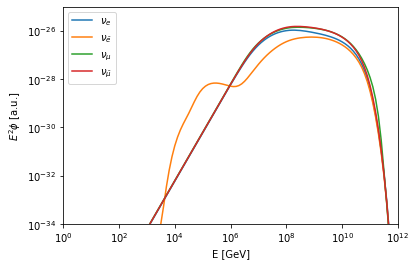

In [7]:
plt.plot(10**energyrange,10**benchmarkflux10[:,0],10**energyrange,10**benchmarkflux10[:,1],10**energyrange,10**benchmarkflux10[:,2],10**energyrange,10**benchmarkflux10[:,3])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e12)
plt.ylim(1e-34,1e-25)
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2 \phi$ [a.u.]')
plt.legend([r'$\nu_e$',r'$\nu_\bar{e}$',r'$\nu_\mu$',r'$\nu_\bar{\mu}$'])

Second example plot: we show the all-flavor neutrino flux for 5 different temperatures. The flux for $T'=0.1$ eV was already computed above in benchmarkflux10.

In [8]:
benchmarkflux9=Flux_9([[log10b,log10R,en] for en in energyrange])#flux over the energy grid
benchmarkflux8=Flux_8([[log10b,log10R,en] for en in energyrange])#flux over the energy grid
benchmarkflux7=Flux_7([[log10b,log10R,en] for en in energyrange])#flux over the energy grid
benchmarkflux6=Flux_6([[log10b,log10R,en] for en in energyrange])#flux over the energy grid

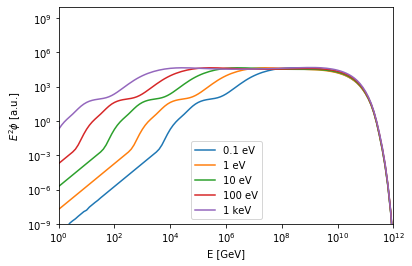

In [9]:
#Factor of ((1e-n)**-3) for temperature 1e-n GeV is for keeping
#the total number of target photons fixed, since the total number
#of target photons scales as T^3 for a blackbody spectrum
plt.plot(10**energyrange,((1e-10)**-3)*(10**benchmarkflux10).sum(axis=1),10**energyrange,((1e-9)**-3)*(10**benchmarkflux9).sum(axis=1),10**energyrange,((1e-8)**-3)*(10**benchmarkflux8).sum(axis=1),10**energyrange,((1e-7)**-3)*(10**benchmarkflux7).sum(axis=1),10**energyrange,((1e-6)**-3)*(10**benchmarkflux6).sum(axis=1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e12)
plt.ylim(1e-9,1e10)
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2 \phi$ [a.u.]')
plt.legend(['0.1 eV', '1 eV', '10 eV', '100 eV', '1 keV'])

Here we reproduce the upper panels of Fig. 7 in arXiv: . The benchmark choice of parameters are therefore the same. 

In [10]:
#Upper left panel: parameter choice and flux computation
log10b=log(10**2.74)/log(10)#magnetic field in Gauss
log10R=log(10**9.18)/log(10)#source size in km
log10G=log(10)/log(10)#Doppler factor
benchmarkflux10=Flux_10([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid
benchmarkflux7=Flux_7([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid
benchmarkflux5=Flux_5([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid

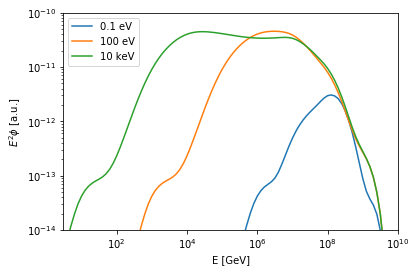

In [11]:
#Upper left panel of Fig. 7
plt.plot(10**energyrange,1e15*(10**benchmarkflux10).sum(axis=1),10**energyrange,1e6*(10**benchmarkflux7).sum(axis=1),10**energyrange,(10**benchmarkflux5).sum(axis=1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(3,1e10)
plt.ylim(1e-14,1e-10)
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2 \phi$ [a.u.]')
plt.legend(['0.1 eV',  '100 eV', '10 keV'])

In [12]:
#Upper middle panel: parameter choice and flux computation
log10b=log(10**1.56)/log(10)#magnetic field in Gauss
log10R=log(10**10.37)/log(10)#source size in km
log10G=log(10)/log(10)#Doppler factor
benchmarkflux10=Flux_10([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid
benchmarkflux7=Flux_7([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid
benchmarkflux5=Flux_5([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid

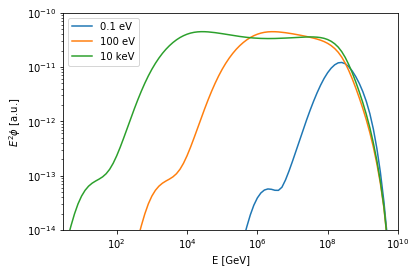

In [13]:
#Upper middle panel of Fig. 7
plt.plot(10**energyrange,1e15*(10**benchmarkflux10).sum(axis=1),10**energyrange,1e6*(10**benchmarkflux7).sum(axis=1),10**energyrange,(10**benchmarkflux5).sum(axis=1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(3,1e10)
plt.ylim(1e-14,1e-10)
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2 \phi$ [a.u.]')
plt.legend(['0.1 eV',  '100 eV', '10 keV'])

In [14]:
#Upper right panel: parameter choice and flux computation
log10b=log(10**0.38)/log(10)#magnetic field in Gauss
log10R=log(10**11.54)/log(10)#source size in km
log10G=log(10)/log(10)#Doppler factor
benchmarkflux10=Flux_10([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid
benchmarkflux7=Flux_7([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid
benchmarkflux5=Flux_5([[log10b,log10R,en-log10G] for en in energyrange])#flux over the energy grid

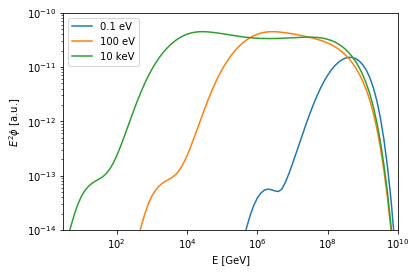

In [15]:
#Upper right panel of Fig. 7
plt.plot(10**energyrange,1e15*(10**benchmarkflux10).sum(axis=1),10**energyrange,1e6*(10**benchmarkflux7).sum(axis=1),10**energyrange,(10**benchmarkflux5).sum(axis=1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(3,1e10)
plt.ylim(1e-14,1e-10)
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2 \phi$ [a.u.]')
plt.legend(['0.1 eV',  '100 eV', '10 keV'])

Here we reproduce the upper panels of Fig. 7 in arXiv: . The parameters are fixed to the same values as above.

In [16]:
#PMNS matrix: the mixing angles are chosen to their best-fit values
#in Prog. Theor. Exp. Phys. 2020, 083C01 (2020)
Unum=np.array([[0.823344, 0.548001, -0.0628656 + 0.133596j], [-0.335108 + 0.0821031j, 0.587244 + 0.0546462j, 0.730151], [0.444341 + 0.0750182j, -0.591067 + 0.0499306j, 0.667143]])

ProbEarth takes as input [ $\phi_{\nu_e}$,$\phi_{\nu_\mu}$,$\phi_{\nu_\tau}$ ] at the source and converts it into fluxes at Earth. We do not separate between neutrino and antineutrino.

In [17]:
def ProbEarth(ProbSource):
    return np.array([sum([sum([Unum[a,i]*np.conj(Unum[a,i])*Unum[b,i]*np.conj(Unum[b,i])*ProbSource[a] for a in range(3)]) for i in range(3)]) for b in range(3)])

In [18]:
#Lower left panel: parameter choice and flux computation
log10b=log(10**2.74)/log(10)#magnetic field in Gauss
log10R=log(10**9.18)/log(10)#source size in km
log10G=log(10)/log(10)#Doppler factor
#Ranges are chosen so that the total flux is above 1/1000 
#of the peak value
energyrange10=np.linspace(log(3.3e5)/log(10),log(3.9e9)/log(10),100)
energyrange7=np.linspace(log(1259)/log(10),log(2.75e9)/log(10),100)
energyrange5=np.linspace(log(12.6)/log(10),log(2.75e9)/log(10),100)
benchmarkflux10=Flux_10([[log10b,log10R,en-log10G] for en in energyrange10])#flux over the energy grid
benchmarkflux7=Flux_7([[log10b,log10R,en-log10G] for en in energyrange7])#flux over the energy grid
benchmarkflux5=Flux_5([[log10b,log10R,en-log10G] for en in energyrange5])#flux over the energy grid
#Reshape the fluxes into an array of the form
#[phi_e+phi_ebar, phi_mu+phi_mubar, phi_tau+phi_taubar]
#at the source
fluxflavorsource10=np.array([10**benchmarkflux10[:,0]+10**benchmarkflux10[:,1],10**benchmarkflux10[:,2]+10**benchmarkflux10[:,3],np.full_like(benchmarkflux10[:,0],0)]).transpose()
fluxflavorsource7=np.array([10**benchmarkflux7[:,0]+10**benchmarkflux7[:,1],10**benchmarkflux7[:,2]+10**benchmarkflux7[:,3],np.full_like(benchmarkflux7[:,0],0)]).transpose()
fluxflavorsource5=np.array([10**benchmarkflux5[:,0]+10**benchmarkflux5[:,1],10**benchmarkflux5[:,2]+10**benchmarkflux5[:,3],np.full_like(benchmarkflux5[:,0],0)]).transpose()
#Conversion of fluxes at the Earth
fluxflavorearth10=np.array([ProbEarth(flux10).real for flux10 in fluxflavorsource10])
fluxflavorearth7=np.array([ProbEarth(flux7).real for flux7 in fluxflavorsource7])
fluxflavorearth5=np.array([ProbEarth(flux5).real for flux5 in fluxflavorsource5])

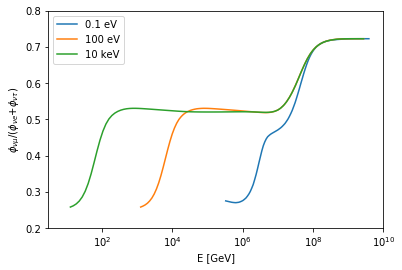

In [19]:
#Lower left panel of Fig. 7: we plot the ratio phi_mu/(phi_e+phi_tau)
plt.plot(10**energyrange10,fluxflavorearth10[:,1]/(fluxflavorearth10[:,0]+fluxflavorearth10[:,2]),10**energyrange7,fluxflavorearth7[:,1]/(fluxflavorearth7[:,0]+fluxflavorearth7[:,2]),10**energyrange5,fluxflavorearth5[:,1]/(fluxflavorearth5[:,0]+fluxflavorearth5[:,2]))
plt.xlim(3,1e10)
plt.xscale('log')
plt.ylim(0.2,0.8)
plt.xlabel('E [GeV]')
plt.ylabel(r'$\phi_{\nu\mu}$/($\phi_{\nu e}$+$\phi_{\nu\tau}$)')
plt.legend(['0.1 eV','100 eV','10 keV'])

In [20]:
#Lower middle panel: parameter choice and flux computation
log10b=log(10**1.56)/log(10)#magnetic field in Gauss
log10R=log(10**10.37)/log(10)#source size in km
log10G=log(10)/log(10)#Doppler factor
#Ranges are chosen so that the total flux is above 1/1000 
#of the peak value
energyrange10=np.linspace(log(5.8e5)/log(10),log(5.4e9)/log(10),100)
energyrange7=np.linspace(log(1259)/log(10),log(4.03e9)/log(10),100)
energyrange5=np.linspace(log(12.6)/log(10),log(4.03e9)/log(10),100)
benchmarkflux10=Flux_10([[log10b,log10R,en-log10G] for en in energyrange10])#flux over the energy grid
benchmarkflux7=Flux_7([[log10b,log10R,en-log10G] for en in energyrange7])#flux over the energy grid
benchmarkflux5=Flux_5([[log10b,log10R,en-log10G] for en in energyrange5])#flux over the energy grid
#Reshape the fluxes into an array of the form
#[phi_e+phi_ebar, phi_mu+phi_mubar, phi_tau+phi_taubar]
#at the source
fluxflavorsource10=np.array([10**benchmarkflux10[:,0]+10**benchmarkflux10[:,1],10**benchmarkflux10[:,2]+10**benchmarkflux10[:,3],np.full_like(benchmarkflux10[:,0],0)]).transpose()
fluxflavorsource7=np.array([10**benchmarkflux7[:,0]+10**benchmarkflux7[:,1],10**benchmarkflux7[:,2]+10**benchmarkflux7[:,3],np.full_like(benchmarkflux7[:,0],0)]).transpose()
fluxflavorsource5=np.array([10**benchmarkflux5[:,0]+10**benchmarkflux5[:,1],10**benchmarkflux5[:,2]+10**benchmarkflux5[:,3],np.full_like(benchmarkflux5[:,0],0)]).transpose()
#Conversion of fluxes at the Earth
fluxflavorearth10=np.array([ProbEarth(flux10).real for flux10 in fluxflavorsource10])
fluxflavorearth7=np.array([ProbEarth(flux7).real for flux7 in fluxflavorsource7])
fluxflavorearth5=np.array([ProbEarth(flux5).real for flux5 in fluxflavorsource5])

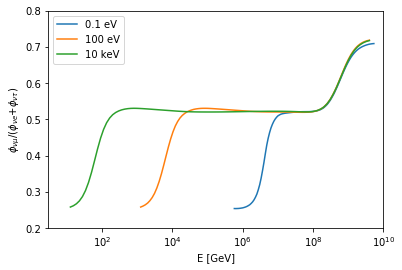

In [21]:
#Lower middle panel of Fig. 7: we plot the ratio phi_mu/(phi_e+phi_tau)
plt.plot(10**energyrange10,fluxflavorearth10[:,1]/(fluxflavorearth10[:,0]+fluxflavorearth10[:,2]),10**energyrange7,fluxflavorearth7[:,1]/(fluxflavorearth7[:,0]+fluxflavorearth7[:,2]),10**energyrange5,fluxflavorearth5[:,1]/(fluxflavorearth5[:,0]+fluxflavorearth5[:,2]))
plt.xlim(3,1e10)
plt.xscale('log')
plt.ylim(0.2,0.8)
plt.xlabel('E [GeV]')
plt.ylabel(r'$\phi_{\nu\mu}$/($\phi_{\nu e}$+$\phi_{\nu\tau}$)')
plt.legend(['0.1 eV','100 eV','10 keV'])

In [22]:
#Lower right panel: parameter choice and flux computation
log10b=log(10**0.38)/log(10)#magnetic field in Gauss
log10R=log(10**11.54)/log(10)#source size in km
log10G=log(10)/log(10)#Doppler factor
#Ranges are chosen so that the total flux is above 1/1000 
#of the peak value
energyrange10=np.linspace(log(6.2e5)/log(10),log(7.3e9)/log(10),100)
energyrange7=np.linspace(log(1259)/log(10),log(5.2e9)/log(10),100)
energyrange5=np.linspace(log(12.6)/log(10),log(5.5e9)/log(10),100)
benchmarkflux10=Flux_10([[log10b,log10R,en-log10G] for en in energyrange10])#flux over the energy grid
benchmarkflux7=Flux_7([[log10b,log10R,en-log10G] for en in energyrange7])#flux over the energy grid
benchmarkflux5=Flux_5([[log10b,log10R,en-log10G] for en in energyrange5])#flux over the energy grid
#Reshape the fluxes into an array of the form
#[phi_e+phi_ebar, phi_mu+phi_mubar, phi_tau+phi_taubar]
#at the source
fluxflavorsource10=np.array([10**benchmarkflux10[:,0]+10**benchmarkflux10[:,1],10**benchmarkflux10[:,2]+10**benchmarkflux10[:,3],np.full_like(benchmarkflux10[:,0],0)]).transpose()
fluxflavorsource7=np.array([10**benchmarkflux7[:,0]+10**benchmarkflux7[:,1],10**benchmarkflux7[:,2]+10**benchmarkflux7[:,3],np.full_like(benchmarkflux7[:,0],0)]).transpose()
fluxflavorsource5=np.array([10**benchmarkflux5[:,0]+10**benchmarkflux5[:,1],10**benchmarkflux5[:,2]+10**benchmarkflux5[:,3],np.full_like(benchmarkflux5[:,0],0)]).transpose()
#Conversion of fluxes at the Earth
fluxflavorearth10=np.array([ProbEarth(flux10).real for flux10 in fluxflavorsource10])
fluxflavorearth7=np.array([ProbEarth(flux7).real for flux7 in fluxflavorsource7])
fluxflavorearth5=np.array([ProbEarth(flux5).real for flux5 in fluxflavorsource5])

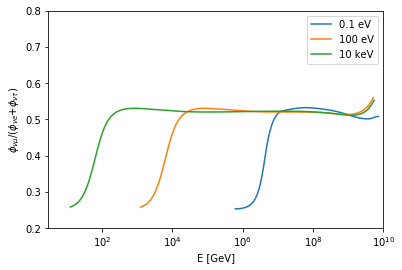

In [23]:
#Lower right panel of Fig. 7: we plot the ratio phi_mu/(phi_e+phi_tau)
plt.plot(10**energyrange10,fluxflavorearth10[:,1]/(fluxflavorearth10[:,0]+fluxflavorearth10[:,2]),10**energyrange7,fluxflavorearth7[:,1]/(fluxflavorearth7[:,0]+fluxflavorearth7[:,2]),10**energyrange5,fluxflavorearth5[:,1]/(fluxflavorearth5[:,0]+fluxflavorearth5[:,2]))
plt.xlim(3,1e10)
plt.xscale('log')
plt.ylim(0.2,0.8)
plt.xlabel('E [GeV]')
plt.ylabel(r'$\phi_{\nu\mu}$/($\phi_{\nu e}$+$\phi_{\nu\tau}$)')
plt.legend(['0.1 eV','100 eV','10 keV'])